### TLC TRIP DATA 

### 2021 JEN ~ JUL YELLOW_TAXI_TRIP_RECORDS.PARQUET 

### TAXI_ZONE_MAPS & LOOKUP TABLES.CSV

In [2]:
from pyspark.sql import SparkSession

ss = SparkSession.builder.appName('test').getOrCreate()

In [3]:
dir = '/Users/admin/Desktop/spark_hadoop/data-engineering/01-spark/dataset'
file = '03newdata.csv'

data = ss.read.csv(f"file:///{dir}/{file}", inferSchema = True, header = True)

In [4]:
df = data.drop('_c0')

df.show(5)

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [5]:
df.createOrReplaceTempView('mobility_dataset')

In [6]:
ss.sql("select split(pickup_datetime, ' ')\
       from mobility_dataset").show()

+-----------------------------+
|split(pickup_datetime,  , -1)|
+-----------------------------+
|         [2020-03-01, 00:0...|
|         [2020-03-01, 00:2...|
|         [2020-03-01, 00:0...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:0...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:5...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:2...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:2...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:5...|
|         [2020-03-01, 00:5...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:3...|
|         [2020-03-01, 00:2...|
+-----------------------------+
only showing top 20 rows



In [7]:
ss.sql("select pickup_datetime\
        from mobility_dataset").show()

+-------------------+
|    pickup_datetime|
+-------------------+
|2020-03-01 00:03:40|
|2020-03-01 00:28:05|
|2020-03-01 00:03:07|
|2020-03-01 00:18:42|
|2020-03-01 00:44:24|
|2020-03-01 00:17:23|
|2020-03-01 00:01:18|
|2020-03-01 00:43:27|
|2020-03-01 00:52:23|
|2020-03-01 00:19:49|
|2020-03-01 00:29:34|
|2020-03-01 00:41:44|
|2020-03-01 00:11:26|
|2020-03-01 00:28:05|
|2020-03-01 00:44:28|
|2020-03-01 00:56:50|
|2020-03-01 00:56:14|
|2020-03-01 00:14:15|
|2020-03-01 00:31:38|
|2020-03-01 00:26:31|
+-------------------+
only showing top 20 rows



In [8]:
ss.sql("select split(pickup_datetime, ' ')[0] as splited_date\
       from mobility_dataset").show()

+------------+
|splited_date|
+------------+
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
+------------+
only showing top 20 rows



In [9]:
ss.sql("select count(*)\
       from(select split(pickup_datetime, ' ')[0] as splited_date\
            from mobility_dataset)\
       group by splited_date").show()

+--------+
|count(1)|
+--------+
|  648990|
|  784260|
|  697880|
|  707879|
|  731165|
|  872012|
|  886071|
|  731222|
|  628940|
|  626474|
|  628601|
|  643257|
|  660914|
|  569397|
|  391518|
|  448125|
|  252773|
|  312298|
|  269233|
|  261900|
+--------+
only showing top 20 rows



In [10]:
ss.sql("select pickup_datetime as pickup_date, count(*) as trip_count\
       from (select split(pickup_datetime, ' ')[0] as pickup_datetime \
       from mobility_dataset)\
       group by pickup_datetime\
       order by pickup_datetime asc").show()

+-----------+----------+
|pickup_date|trip_count|
+-----------+----------+
| 2020-03-01|    784260|
| 2020-03-02|    648990|
| 2020-03-03|    697880|
| 2020-03-04|    707879|
| 2020-03-05|    731165|
| 2020-03-06|    872012|
| 2020-03-07|    886071|
| 2020-03-08|    731222|
| 2020-03-09|    628940|
| 2020-03-10|    626474|
| 2020-03-11|    628601|
| 2020-03-12|    643257|
| 2020-03-13|    660914|
| 2020-03-14|    569397|
| 2020-03-15|    448125|
| 2020-03-16|    391518|
| 2020-03-17|    312298|
| 2020-03-18|    269233|
| 2020-03-19|    252773|
| 2020-03-20|    261900|
+-----------+----------+
only showing top 20 rows



In [11]:
dir = '/Users/admin/Desktop/spark_hadoop/data-engineering/01-spark/dataset'
file = 'taxi+_zone_lookup.csv'

df2 = ss.read.csv(f"file:///{dir}/{file}", inferSchema = True, header = True)

In [12]:
df2.show()

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
|        11|     Brooklyn|          Bath Beach|   Boro Zone|
|        12|    Manhattan|        Battery Park| Yellow Zone|
|        13|    Manhattan|   Battery Park City| Yellow Zone|
|        14|     Brookly

In [13]:
df2.createOrReplaceTempView('region_dataset')

In [14]:
ss.sql("select region_dataset.Borough from mobility_dataset \
        join region_dataset on mobility_dataset.PULocationID = region_dataset.LocationID").show(5)

+---------+
|  Borough|
+---------+
|    Bronx|
|    Bronx|
|Manhattan|
|Manhattan|
| Brooklyn|
+---------+
only showing top 5 rows



In [15]:
# 승차

ss.sql('select borough, count(*) as trip_count\
        from (select region_dataset.Borough as borough\
              from mobility_dataset \
              join region_dataset on mobility_dataset.PULocationID = region_dataset.LocationID)\
        group by borough\
        order by trip_count desc').show(10)

+-------------+----------+
|      borough|trip_count|
+-------------+----------+
|    Manhattan|   4953147|
|     Brooklyn|   3735765|
|       Queens|   2437394|
|        Bronx|   2086597|
|Staten Island|    178818|
|      Unknown|       845|
|          EWR|       362|
+-------------+----------+



In [16]:
# 하차

ss.sql('select borough, count(*) as trip_count\
        from (select region_dataset.Borough as borough\
              from mobility_dataset \
              join region_dataset on mobility_dataset.DOLocationID = region_dataset.LocationID)\
        group by borough\
        order by trip_count desc').show(10)

+-------------+----------+
|      borough|trip_count|
+-------------+----------+
|    Manhattan|   4553783|
|     Brooklyn|   3696684|
|       Queens|   2468416|
|        Bronx|   2043492|
|      Unknown|    387760|
|Staten Island|    177727|
|          EWR|     65066|
+-------------+----------+



In [17]:
dir2 = '/Users/admin/Desktop/spark_hadoop/data-engineering/01-spark/taxi_1~7/*'

txdf = ss.read.parquet(f"file:///{dir2}", inferSchema = True, header = True)

In [18]:
txdf.printSchema()

df2.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zo

In [19]:
df2.show(5)

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 5 rows



In [20]:
txdf.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2021-06-01 09:13:26|  2021-06-01 09:17:14|            1.0|          0.9|       1.0|                 N|         186|          50|           1|        5.0|  3.0|    0.5|       2.

In [21]:
txdf.createOrReplaceTempView('taxi')

In [22]:
qry = """
select *
from taxi as t
left join region_dataset as pz
on t.PULocationID = pz.LocationID
"""

ss.sql(qry).show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------+---------+--------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|LocationID|  Borough|                Zone|service_zone|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------+---------+--------------------+------------+
|       1| 2021-06-01 

In [23]:
query = """
select *
from taxi as t
left join region_dataset as pz
on t.PULocationID = pz.LocationID
left join region_dataset as dz
on t.DOLocationID = dz.LocationID
"""
                  
df3 = ss.sql(query)
df3.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------+---------+--------------------+------------+----------+---------+-------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|LocationID|  Borough|                Zone|service_zone|LocationID|  Borough|               Zone|service_zone|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+---

In [24]:
query2 = """
select t.VendorID as vendor_id,
       to_date(t.tpep_pickup_datetime) as pickup_date,
       split(t.tpep_pickup_datetime, ' ')[1] as pickup_time,
       pz.Zone as pickup_zone,
       to_date(t.tpep_dropoff_datetime) as dropoff_date,
       split(t.tpep_dropoff_datetime, ' ')[1] as dropoff_time,
       dz.Zone as dropoff_zone,
       t.trip_distance as trip_distance,
       t.fare_amount as fare_amount,
       t.passenger_count as passenger_count,
       concat(cast((unix_timestamp(t.tpep_dropoff_datetime) - unix_timestamp(t.tpep_pickup_datetime))/3600 as int), ':',
              cast((unix_timestamp(t.tpep_dropoff_datetime) - unix_timestamp(t.tpep_pickup_datetime))/60 as int), ':',
             (unix_timestamp(t.tpep_dropoff_datetime) - unix_timestamp(t.tpep_pickup_datetime))%60) as operating_time,   
       t.tolls_amount as tolls_amount,
       t.total_amount as total_amount,
       t.payment_type as payment_type

from taxi as t
left join region_dataset as pz
on t.PULocationID = pz.LocationID
left join region_dataset as dz
on t.DOLocationID = dz.LocationID
"""

new_df = ss.sql(query2)
new_df.show(5)

+---------+-----------+-----------+--------------------+------------+------------+-------------------+-------------+-----------+---------------+--------------+------------+------------+------------+
|vendor_id|pickup_date|pickup_time|         pickup_zone|dropoff_date|dropoff_time|       dropoff_zone|trip_distance|fare_amount|passenger_count|operating_time|tolls_amount|total_amount|payment_type|
+---------+-----------+-----------+--------------------+------------+------------+-------------------+-------------+-----------+---------------+--------------+------------+------------+------------+
|        1| 2021-06-01|   09:13:26|Penn Station/Madi...|  2021-06-01|    09:17:14|       Clinton West|          0.9|        5.0|            1.0|        0:3:48|         0.0|        11.0|           1|
|        1| 2021-06-01|   09:32:23|         JFK Airport|  2021-06-01|    10:07:04|       Bedford Park|         23.0|       61.5|            1.0|       0:34:41|        6.55|        70.6|           2|
|    

In [25]:
new_df.createOrReplaceTempView('new')

In [26]:
ss.sql("select pickup_date, pickup_time \
        from new \
        where pickup_date < '2020-12-31'").show()

+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2009-01-01|   09:59:52|
| 2009-01-02|   01:25:16|
| 2009-01-02|   01:16:55|
| 2009-01-01|   09:05:12|
| 2009-01-01|   09:03:36|
| 2009-01-01|   09:07:24|
| 2009-01-02|   04:16:00|
| 2009-01-02|   04:44:57|
| 2009-01-02|   05:24:51|
| 2009-01-01|   08:15:05|
| 2009-01-01|   08:31:09|
| 2009-01-01|   08:48:11|
| 2009-01-01|   09:08:11|
| 2009-01-01|   09:04:50|
| 2009-01-01|   09:05:20|
| 2009-01-01|   09:02:29|
| 2009-01-01|   09:05:02|
| 2009-01-01|   09:03:03|
| 2009-01-01|   09:03:23|
| 2009-01-01|   09:07:04|
+-----------+-----------+
only showing top 20 rows



In [27]:
new_df.select('total_amount').describe().show()

+-------+------------------+
|summary|      total_amount|
+-------+------------------+
|  count|          15000936|
|   mean| 18.75540051097825|
| stddev|145.74310219085984|
|    min|            -647.8|
|    max|          398469.2|
+-------+------------------+



In [28]:
new_df.select('trip_distance').describe().show()

+-------+-----------------+
|summary|    trip_distance|
+-------+-----------------+
|  count|         15000936|
|   mean|6.628556730059907|
| stddev| 671.724064548099|
|    min|              0.0|
|    max|        332541.19|
+-------+-----------------+



In [29]:
new_df.select('passenger_count').describe().show()

+-------+------------------+
|summary|   passenger_count|
+-------+------------------+
|  count|          14166908|
|   mean|1.4253582362502812|
| stddev|1.0443336003189163|
|    min|               0.0|
|    max|               9.0|
+-------+------------------+



In [30]:
fliter_query = """
select date_trunc('MM', n.pickup_date) as month, count(*) as trips
from new as n
group by month
order by month;
"""

ss.sql(fliter_query).show()

+-------------------+-------+
|              month|  trips|
+-------------------+-------+
|2003-01-01 00:00:00|      2|
|2004-04-01 00:00:00|      1|
|2009-01-01 00:00:00|    137|
|2020-12-01 00:00:00|      1|
|2021-01-01 00:00:00|1355332|
|2021-02-01 00:00:00|1368619|
|2021-03-01 00:00:00|1910234|
|2021-04-01 00:00:00|2156143|
|2021-05-01 00:00:00|2522860|
|2021-06-01 00:00:00|2813017|
|2021-07-01 00:00:00|2825121|
|2021-08-01 00:00:00|  49452|
|2021-09-01 00:00:00|      3|
|2021-10-01 00:00:00|      3|
|2021-11-01 00:00:00|      5|
|2021-12-01 00:00:00|      5|
|2029-05-01 00:00:00|      1|
+-------------------+-------+



In [31]:
eda_df = ss.sql("""
                select *
                from new as n
                where (n.total_amount < 2000 and \
                n.trip_distance < 100 and \
                n.passenger_count <= 5 and \
                '2021-01-01' <= n.pickup_date and\
                n.pickup_date <= '2021-08-31') \
                """)
  
eda_df.createOrReplaceTempView('eda')

In [32]:
eda_df.describe().show()

+-------+-------------------+-----------+--------------------+------------+--------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|          vendor_id|pickup_time|         pickup_zone|dropoff_time|        dropoff_zone|     trip_distance|       fare_amount|   passenger_count|   operating_time|      tolls_amount|      total_amount|      payment_type|
+-------+-------------------+-----------+--------------------+------------+--------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|           13927411|   13927411|            13927411|    13927411|            13927411|          13927411|          13927411|          13927411|         13927411|          13927411|          13927411|          13927411|
|   mean| 1.6820925296165956|       null|                null|        null|         

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [34]:
query_daily_trip_count = """
select e.pickup_date, count(*) as trips
from eda as e
group by e.pickup_date
"""

ss.sql(query_daily_trip_count)

DataFrame[pickup_date: date, trips: bigint]

In [35]:
pd_daily_trip_count = ss.sql(query_daily_trip_count).toPandas()

In [36]:
pd_daily_trip_count

,pickup_date,trips
0,2021-06-22,88656
1,2021-07-19,77126
2,2021-06-04,90452
3,2021-06-20,84944
4,2021-06-27,86197
...,...,...
211,2021-01-13,45447
212,2021-01-17,33767
213,2021-01-20,44718
214,2021-01-28,48994


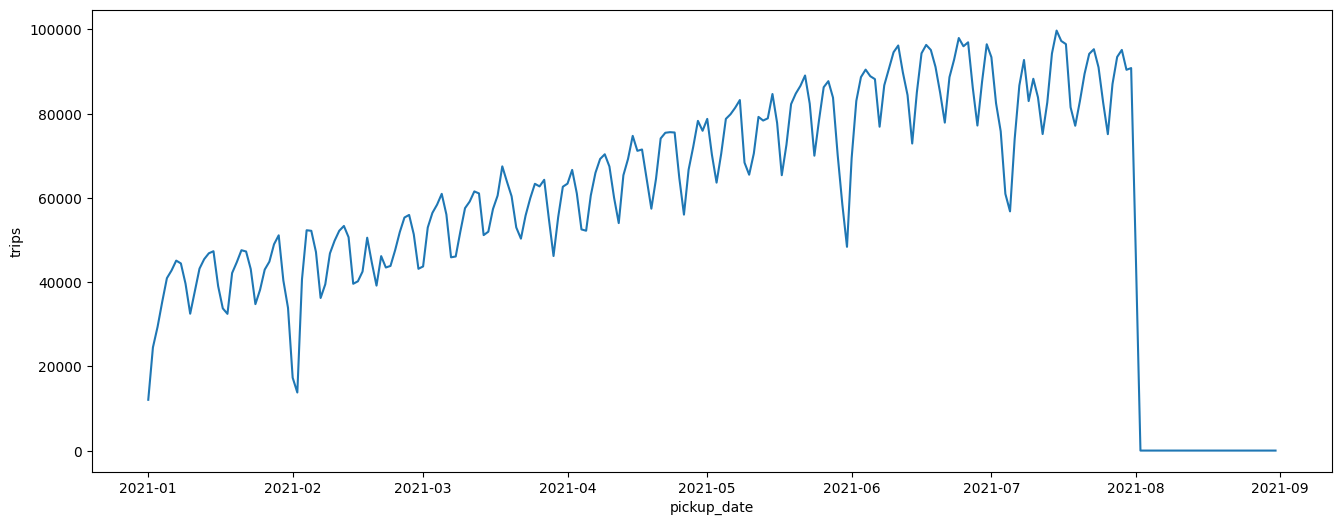

In [37]:
fig, ax = plt.subplots(figsize = (16,6)) # 액자
sns.lineplot(x = 'pickup_date', y = 'trips', data = pd_daily_trip_count)
plt.show()

In [38]:
query_daily_trip_count2 = """
select e.pickup_date, count(*) as trips, date_format(e.pickup_date, 'EEEE') as day
from eda as e
group by e.pickup_date, day
"""

pd_daily_trip_count2 = ss.sql(query_daily_trip_count2).toPandas()

In [39]:
ss.sql(query_daily_trip_count2).show()

+-----------+-----+---------+
|pickup_date|trips|      day|
+-----------+-----+---------+
| 2021-06-03|88676| Thursday|
| 2021-06-25|95998|   Friday|
| 2021-06-22|88656|  Tuesday|
| 2021-06-15|85058|  Tuesday|
| 2021-06-26|96938| Saturday|
| 2021-06-05|88893| Saturday|
| 2021-08-10|    3|  Tuesday|
| 2021-06-23|92850|Wednesday|
| 2021-06-13|84399|   Sunday|
| 2021-06-29|87603|  Tuesday|
| 2021-06-08|86724|  Tuesday|
| 2021-07-02|82460|   Friday|
| 2021-06-28|77177|   Monday|
| 2021-06-21|77873|   Monday|
| 2021-06-20|84944|   Sunday|
| 2021-06-07|76898|   Monday|
| 2021-07-08|92741| Thursday|
| 2021-06-27|86197|   Sunday|
| 2021-06-06|88194|   Sunday|
| 2021-06-14|72908|   Monday|
+-----------+-----+---------+
only showing top 20 rows



In [40]:
data2 = pd_daily_trip_count2.groupby('day').trips.median().to_frame().reset_index()
data2

,day,trips
0,Friday,71173.0
1,Monday,52204.0
2,Saturday,70183.0
3,Sunday,58471.0
4,Thursday,75091.5
5,Tuesday,62550.5
6,Wednesday,70728.0


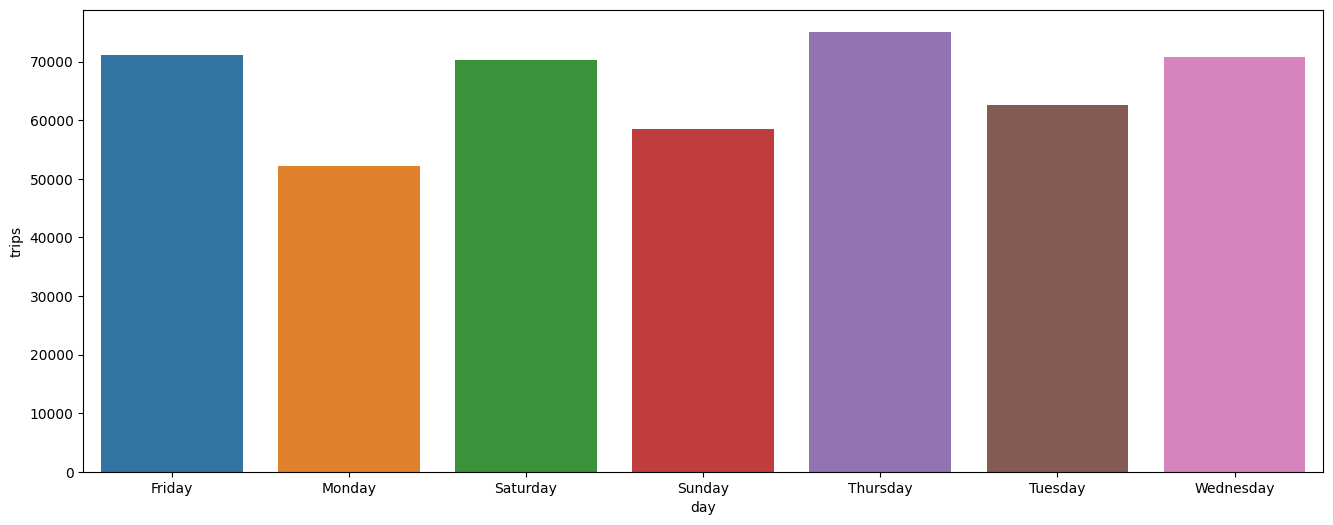

In [41]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x = 'day', y = 'trips', data = data2)
plt.show()

In [42]:
data2['sort_day'] = data2['day'].replace({
                                       'Sunday' : 0,
                                       'Monday' : 1,
                                       'Tuesday' : 2,
                                       'Wednesday' : 3,
                                       'Thursday' : 4,
                                       'Friday' : 5,
                                       'Saturday' : 6
                                       })

data2.sort_values(by='sort_day', inplace = True)
data2

,day,trips,sort_day
3,Sunday,58471.0,0
1,Monday,52204.0,1
5,Tuesday,62550.5,2
6,Wednesday,70728.0,3
4,Thursday,75091.5,4
0,Friday,71173.0,5
2,Saturday,70183.0,6


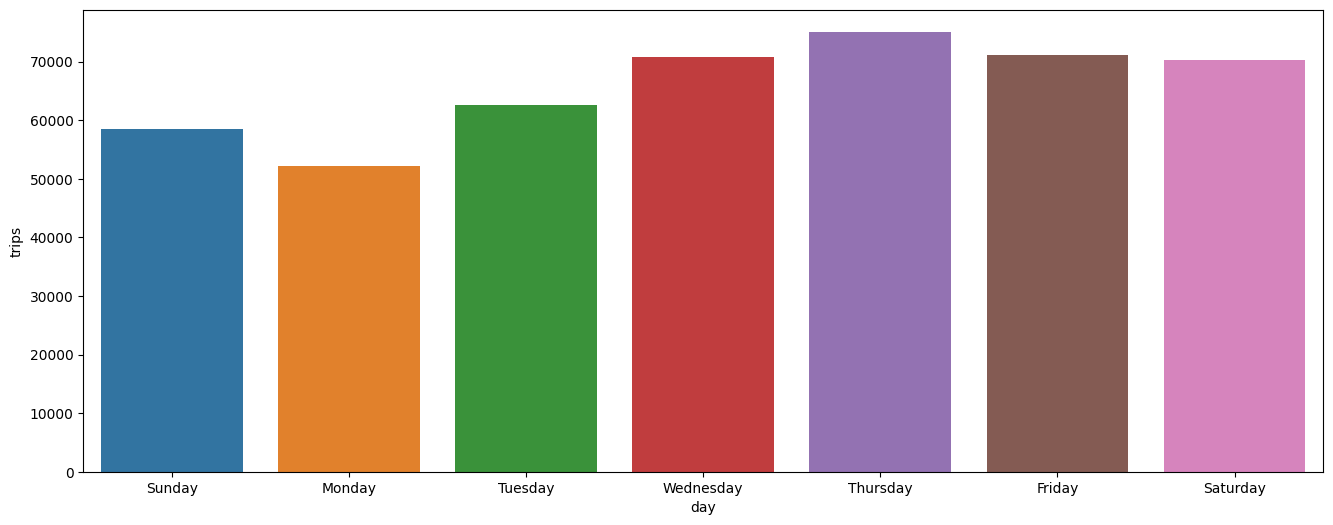

In [43]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x = 'day', y = 'trips', data = data2)
plt.show()

In [44]:
def weekday(data):
    import calendar
    return calendar.day_name(data.weekday())

ss.udf.register('weekday', weekday)

# 사용자 정의 함수

# 함수를 커스텀해서 쿼리할 때 사용가능

<function __main__.weekday(data)>

In [45]:
payment_type_category = {
    1 : 'CREDIT CARD',
    2 : 'CASH',
    3 : 'NO CHARGE',
    4 : 'DISPUTE',
    5 : 'UNKNOWN',
    6 : 'CANCEL',
}

def parse_payment_type(payment_type):
    return payment_type_category[payment_type]

ss.udf.register('parse_payment_type', parse_payment_type)

<function __main__.parse_payment_type(payment_type)>

In [46]:
parse_payment_query = """
select parse_payment_type(payment_type) as payment_type, \
    count(*) as trips, \
    round(mean(fare_amount), 2) as avg_fare_amount, \
    round(std(fare_amount), 2) as std_fare_amount
from eda
group by payment_type
"""

ss.sql(parse_payment_query).show()

+------------+--------+---------------+---------------+
|payment_type|   trips|avg_fare_amount|std_fare_amount|
+------------+--------+---------------+---------------+
| CREDIT CARD|10537182|          12.22|          10.81|
|   NO CHARGE|   80970|           6.69|          17.45|
|        CASH| 3249790|          11.91|          11.32|
|     DISPUTE|   59468|          -2.09|          19.45|
|     UNKNOWN|       1|           17.8|           null|
+------------+--------+---------------+---------------+



In [47]:
payment_df = ss.sql(parse_payment_query).toPandas()

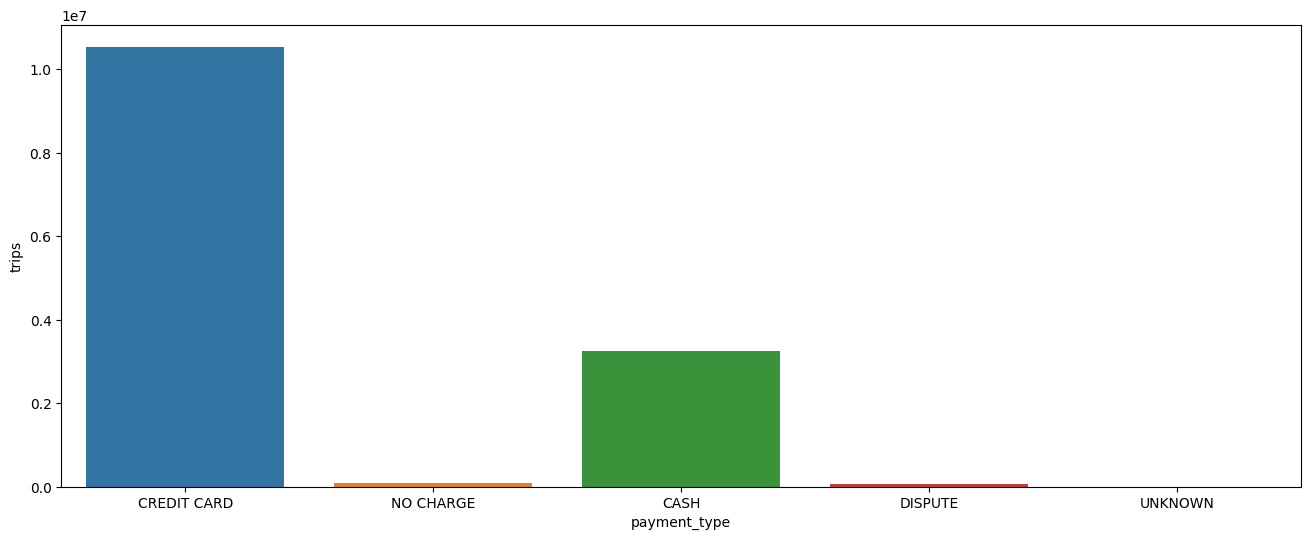

In [48]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = 'payment_type', y = 'trips', data = payment_df)
plt.show()

In [49]:
payment_df

,payment_type,trips,avg_fare_amount,std_fare_amount
0,CREDIT CARD,10537182,12.22,10.81
1,NO CHARGE,80970,6.69,17.45
2,CASH,3249790,11.91,11.32
3,DISPUTE,59468,-2.09,19.45
4,UNKNOWN,1,17.80,NaN
